## Term Project
## Project MileStone 1: Data Selection and EDA
## Puppala Sucharitha
## Data Science, Bellevue University
## DSC550-T301 Data Mining (2231-1)
## Professor : Dr. Brett Werner
## Date : 10/03/2022

## Introduction :

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.

The term “heart disease” is often used interchangeably with the term “cardiovascular disease”. Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis. The amount of data in the healthcare industry is huge. Data mining turns the large collection of raw healthcare data into information that can help to make informed decisions and predictions.

According to a news article, heart disease proves to be the leading cause of death for both women and men.
About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.Coronary Heart Disease(CHD) is the most common type of heart disease, killing over 370,000 people annually.

This makes heart disease a major concern to be dealt with. But it is difficult to identify heart disease because of several contributory risk factors such as diabetes, high blood pressure, high cholesterol, abnormal pulse rate, and many other factors. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

Machine learning (ML) proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry.

This project focuses on to classify / predict whether a patient is prone to heart disease depending on multiple attributes.


In this project the following steps are involved :

* Overview of the Dataset.
* Exploratory Data Analysis.
* Data Preparation.
* Identifying the features that are most influential for having Heart Disease.
* Build different models to predict Heart Disease.

This dataset contains 11 features that can be used to predict a possible heart disease.

1. Age : age of the patient [years]
2. Sex : sex of the patient [M: Male, F: Female]
3. ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP : resting blood pressure [mm Hg]
5. Cholesterol : serum cholesterol [mm/dl]
6. FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
10. Oldpeak : oldpeak = ST [Numeric value measured in depression]
11. ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease : output class [1: heart disease, 0: Normal]


The Heart Failure Prediction dataset is collected from Kaggle.com and the link to the dataset is given below.

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

##### References : 
* Shubhankar Rawat. "HeartDisease Prediction." Medium,Towards Data Science, 10 Aug 2019, https://medium.com/towards-data-science/heart-disease-prediction-73468d630cfc

* fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.


## Milestone -1 :  Data Selection and Exploratory Data Analysis(EDA)

In the Milestone-1, I would like to get an overview of the data set collected and the Exploratory Data Analysis of the the dataset.

In this Milestone-1, I would like to know the following points:

* Distribution of the different features in the data set on the HeartDisease.

* To know the counts of the categorical features available in the dataset.

* Are there any duplicated, missing values and outliers in the dataset.


In [1]:
# Importing all the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the heart dataset which is named heart.csv
heartdf = pd.read_csv('heart.csv')

In [3]:
# Getting the first 5 rows of the heart dataset.
heartdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Getting the shape of the heart dataset
heartdf.shape

(918, 12)

In [5]:
# Getting the size of the dataset
heartdf.size

11016

In [6]:
# Information about the dataset variables.
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Checking for null values
heartdf.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# Checking if any duplicated values present in the data set.
heartdf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [9]:
# Getting the number of unique columns in the data set
heartdf.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

#### Observations of the dataset:

   * The dataset has 918 rows and 12 columns.
   * We can see that the dataset contains both numerical and categorical data.
   * In the initial review of the dataset we can see there are no null values.
   * Extracted the number of unique values for each column.
   * Number of unique values for each column is extracted above and will be reviewed during the EDA section.

###  Exploratory Data Analysis.

In [10]:
# Initially lets's use the describe() to get an idea on the dataset.
heartdf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


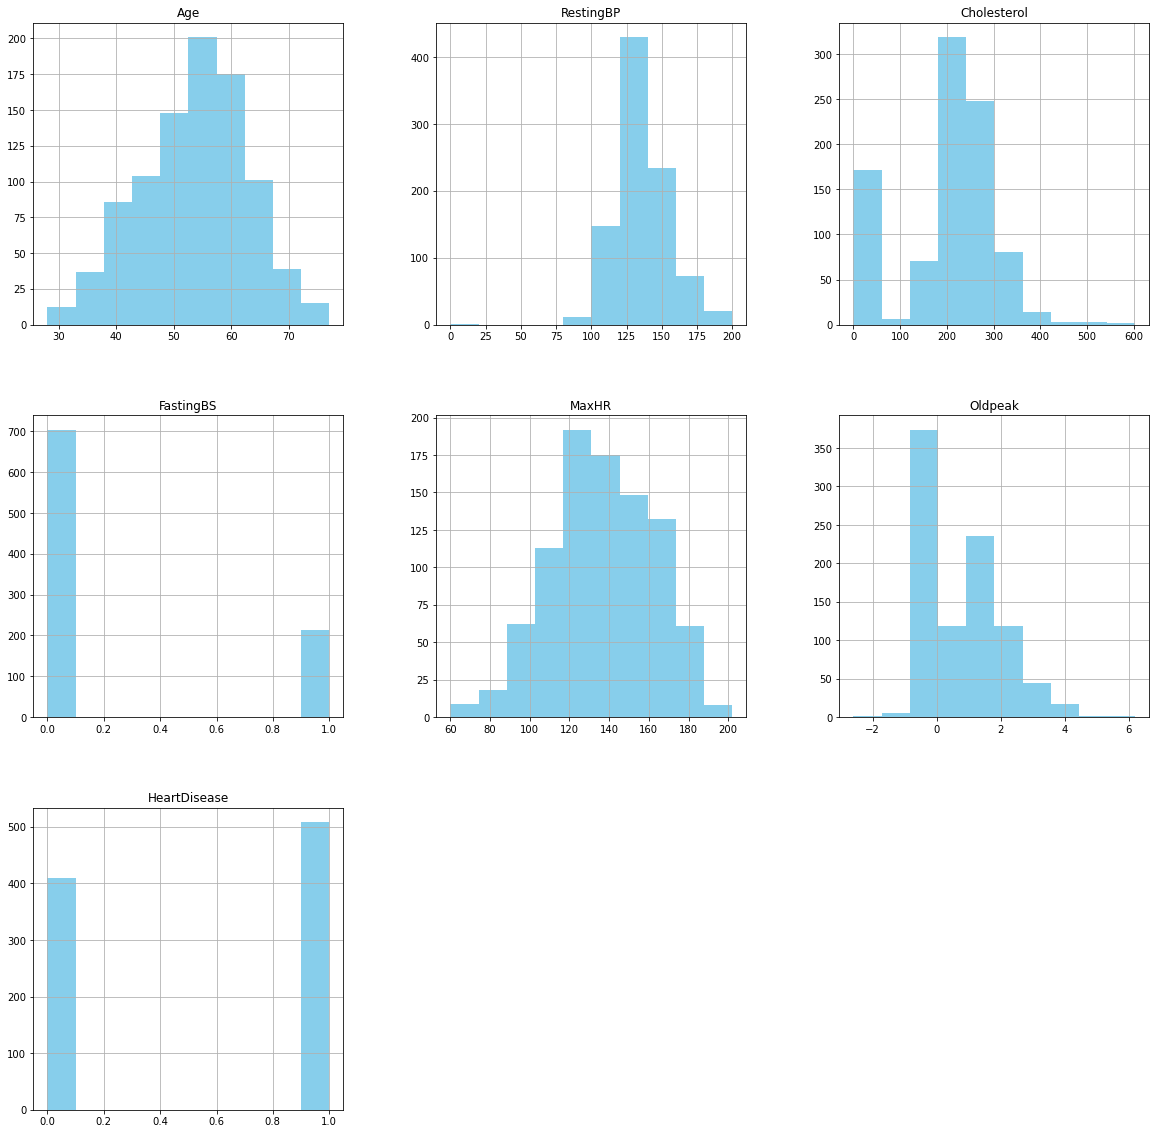

In [11]:
# plot histograms for each numerical variable
heartdf.hist(figsize = (20, 20),color='skyblue')
plt.show()

 #### Observations from the histogram plots of the dataset.
 
 * From the above plots we can see some features are skewed.

### Visualization of the target variable

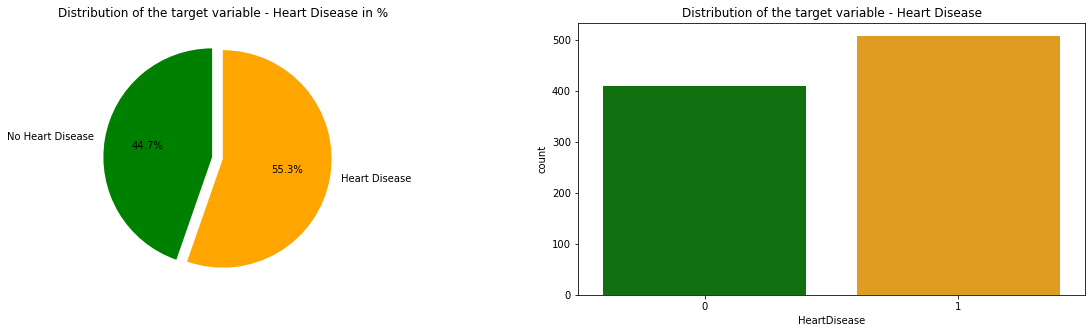

In [12]:
# Let's plot a pie plot and count plot of the target variable 'HeartDisease'
l = list(heartdf['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]
# Setting the colors of the plots.
colors = ['green','orange']

# PLotting the pie plot.
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Distribution of the target variable - Heart Disease in %'); # Title of the plot.

# Plotting the count plot.
plt.subplot(1,2,2)
sns.countplot('HeartDisease',data = heartdf,palette = colors)
plt.title('Distribution of the target variable - Heart Disease');# Title of the plot
plt.show()

#### Observations from the target variable pie plot and count plot.

   * From the above visualizations we can see that the dataset is evenly balanced.
   * We can see from the pie plot that 55.3% are having Heart Disease and 44.7% are not having any Heart Disease.
   

### Visualization of the target variable with sex.


Text(0, 0.5, 'Count')

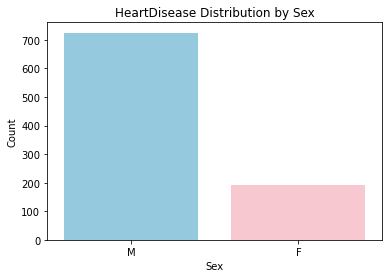

In [13]:
#Let's cheeck for the distribution of HeartDisease by sex.
sns.countplot(data=heartdf,x='Sex' , palette=['skyblue','pink']);
#Title of the plot
plt.title('HeartDisease Distribution by Sex')
# X- label
plt.xlabel('Sex')
# Y- label
plt.ylabel('Count')

#### Observations of the target variable by sex.

   * Here we can see that males are highly proned to have HeartDisease.
 

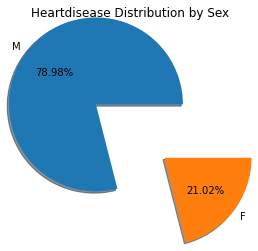

In [14]:
# Let's plot a pie plot for the distribution of heart disease by sex.
plt.rcParams.update({'font.size': 10})
ax=heartdf['Sex'].value_counts().plot.pie(explode=[0.5,0.5],autopct='%1.2f%%',shadow=True );
# Plot title.
ax.set_title(label = "Heartdisease Distribution by Sex");
plt.axis('off');

#### Observations of the pie plot :
* From the above pie plot we see that about 78.98% of males have heart disease and 21.02% of females have HeartDisease.
* We can say that Males are approximately 3 times more likely to have HeartDisease than females.

### Dividing the Categorical and Numerical variables from the dataset.

In [15]:
# Let's divide the categorical and numerical variables from the dataset.
col = list(heartdf.columns)
categ_features = []
numer_features = []
for i in col:
    if heartdf[i].dtype == np.object:
        categ_features.append(i)
    else:
        numer_features.append(i)

print('Categorical Features of the heart dataset :',*categ_features)
print('Numerical Features of the heart dataset :',*numer_features)

Categorical Features of the heart dataset : Sex ChestPainType RestingECG ExerciseAngina ST_Slope
Numerical Features of the heart dataset : Age RestingBP Cholesterol FastingBS MaxHR Oldpeak HeartDisease


### Plotting Numerical features with Target Variable i.e HeartDisease.

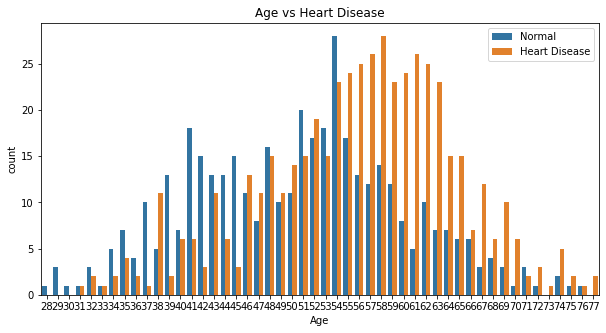

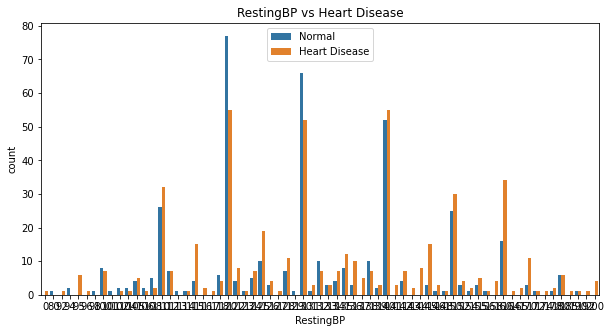

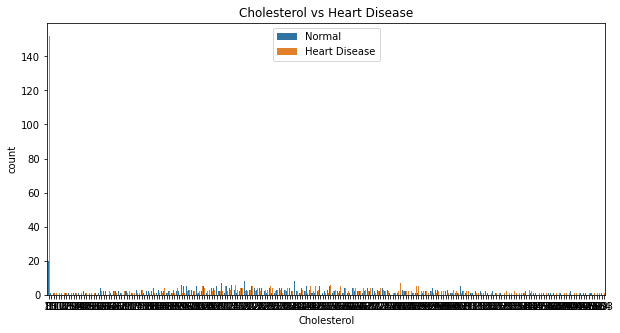

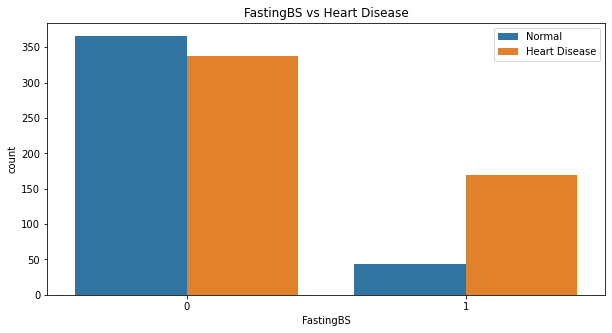

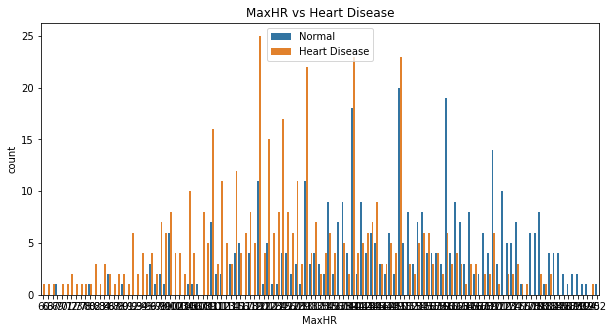

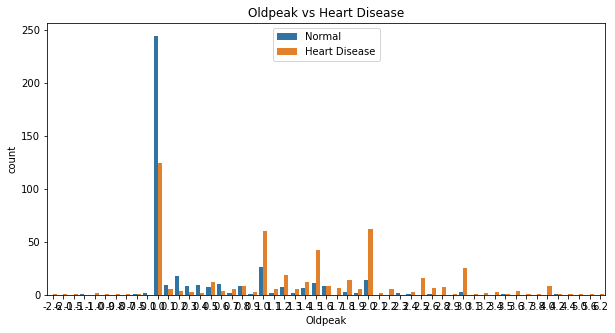

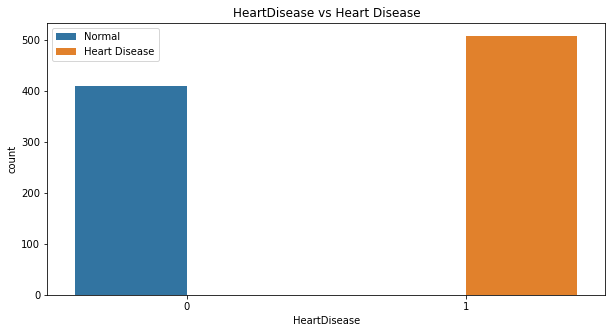

In [16]:
# Ploting numerical features with target variable.
# With these plots we compare between our target and our numerical features.
#colors = ['green','orange']
for i in numer_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=heartdf, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i + " vs Heart Disease")# Plot title
    plt.show()

#### Observations:

* From the above count plot of Age vs HeartDisease most of the heart disease Patients have age between 55 and 65

* From the above count plot of Fasting Blood Sugar vs HeartDisease , we see that the persons having FastingBS and positive HeartDisease couts upto 150.

* From the above graphs we can see that the distribution of the features RestingBP,Cholesterol,MaxHR and Oldpeak are not clearly understanble because of the presence of many unique data points in the features. 

* For more clear understanding let us scale the individual values of these features which brings the data points to a constant value representing a range of values.

* Here I have divided the data points of the numerical features by 5 or 10 and assigned the quotient value as the representative of the constant data point.

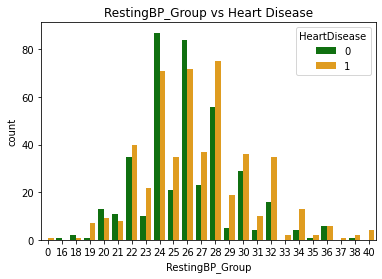

In [17]:
# Scaling the 'RestingBP'
colors = ['green','orange']
heartdf['RestingBP_Group'] = [ int(i / 5) for i in heartdf['RestingBP']]
restingBP_group = heartdf['RestingBP_Group']
sns.countplot(restingBP_group,data = heartdf,hue = "HeartDisease",palette = colors)
title = 'RestingBP_Group vs Heart Disease' # Plot title
plt.title(title);


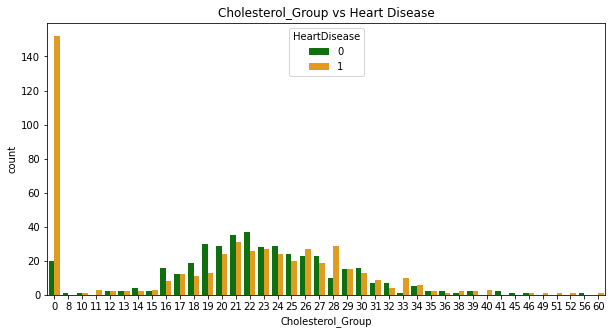

In [18]:
# Scaling of 'Cholesterol'
heartdf['Cholesterol_Group'] = [ int(i / 10) for i in heartdf['Cholesterol']]
cholestrol_group = heartdf['Cholesterol_Group']
plt.figure(figsize=(10,5))
sns.countplot(cholestrol_group,data = heartdf,hue = "HeartDisease",palette = colors)
title =  'Cholesterol_Group vs Heart Disease'# Plot Title.
plt.title(title);


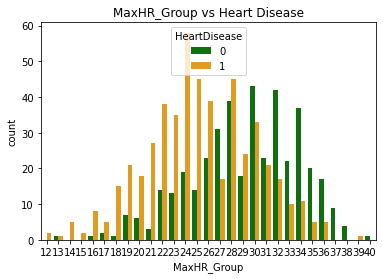

In [19]:
# Scaling of 'MaxHR'
heartdf['MaxHR_Group'] = [ int(i / 5) for i in heartdf['MaxHR']]
maxhr_group = heartdf['MaxHR_Group']
sns.countplot(maxhr_group,data = heartdf,hue = "HeartDisease",palette = colors)
title = 'MaxHR_Group vs Heart Disease' # Plot Title
plt.title(title);


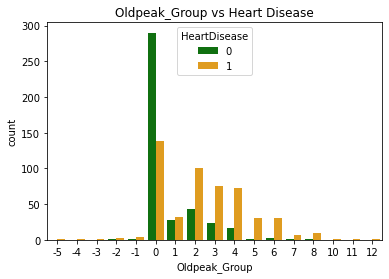

In [20]:
# Scaling of 'Oldpeak'
heartdf['Oldpeak_Group'] = [ int( (i*10) / 5) for i in heartdf['Oldpeak']]
oldpeak_group = heartdf['Oldpeak_Group']
sns.countplot(oldpeak_group,data = heartdf,hue = "HeartDisease",palette = colors)
title = 'Oldpeak_Group vs Heart Disease'# Plot title.
plt.title(title);


#### Observations of count plots of :

* From the graph of scaled RestingBP, we can say that the values 95 to 170 ((19*5)- (34*5))are mostly proned to have HeartDisease.

* From the graph of scaled Cholesterol, we can say that the values 160 to 340 ((16*10)- (34*10))are proned to have HeartDisease.

* From the graph of scaled MaxHR, we can say that the values 70 to 180 ((14*5) - (36*5)) are mostly proned to have HeartDisease.

* From the graph of sccaled Oldpeak, we can say that the values 0 to 8 i.e 0 to 4((0*5/10) - (8*5/10))  are mostly proned to have HeartDisease.


In [21]:
# Drop the grouped columns that are created.
heartdf = heartdf.drop(columns = ["Oldpeak_Group","RestingBP_Group","Cholesterol_Group","MaxHR_Group"])

### Plotting Categorical Features with the Target Variable i.e. Heart Disease.

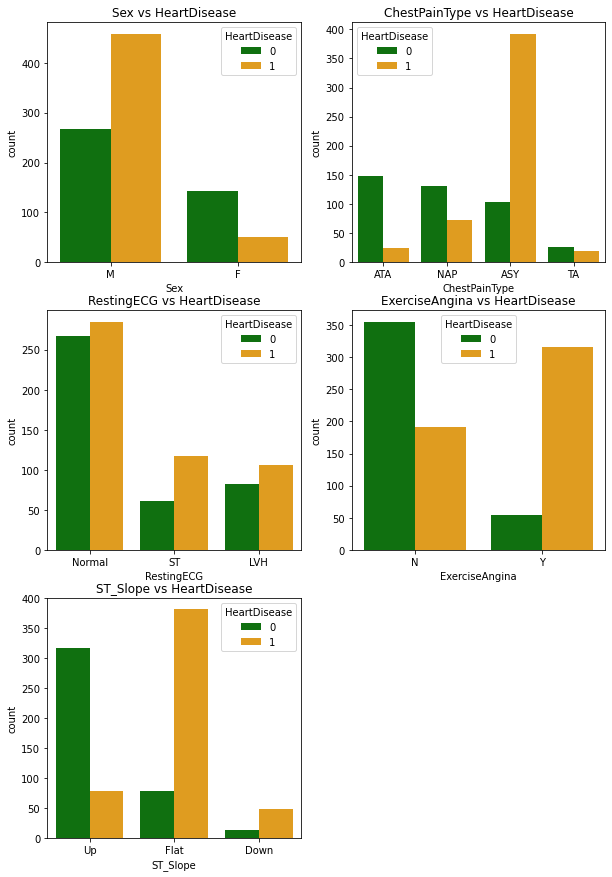

In [22]:
# Plotting categorical features with the target variable.
# here we compare between target and Categorical features 
colors = ['green','orange']
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (10,15))
for i in range(len(categ_features)):
    plt.subplot(3,2,i+1)
    sns.countplot(categ_features[i],data = heartdf,hue = "HeartDisease",palette = colors)
    title = categ_features[i] + ' vs HeartDisease'
    plt.title(title);

#### Observations of Count plots:

The following observations are made from the above plots.

* From the above 'Sex vs HeartDisease' plot we can say that the Male population has more proned to HeartDisease and Female population are less proned to HeartDisease.

* The 'ChestPainType vs HeartDisease' plot  has four types they are - TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic among these four ASY type has more positive HeartDisease cases.

* From the 'RestingECG vs HeartDisease' plot we see that all the three types are having Heart Disease.

* From the 'ExerciseAngina vs HeartDisease' plot we see that the persons having ExerciseAngina are more proned to have HeartDisease.

* From the 'ST_Slope vs HeartDisease'plot we can see that the persons having flat slop are more proned to have HeartDisease.


### Visualizations of Categorical Features vs Positive Heart Disease Cases :

In [23]:
# Getting the postive heart disease data for the categorial features.

# Sex feature
sex = heartdf[heartdf['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

# ChestPainType
chestpain = heartdf[heartdf['HeartDisease'] == 1]['ChestPainType'].value_counts()
chestpain = [chestpain[0] / sum(chestpain) * 100,chestpain[1] / sum(chestpain) * 100,chestpain[2] / sum(chestpain) * 100,chestpain[3] / sum(chestpain) * 100]

# RestingECG
restingecg = heartdf[heartdf['HeartDisease'] == 1]['RestingECG'].value_counts()
restingecg = [restingecg[0] / sum(restingecg) * 100,restingecg[1] / sum(restingecg) * 100,restingecg[2] / sum(restingecg) * 100]

# ExerciseAngina
exerangina = heartdf[heartdf['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exerangina = [exerangina[0] / sum(exerangina) * 100,exerangina[1] / sum(exerangina) * 100]

# ST_Slope
stslope = heartdf[heartdf['HeartDisease'] == 1]['ST_Slope'].value_counts()
stslope = [stslope[0] / sum(stslope) * 100,stslope[1] / sum(stslope) * 100,stslope[2] / sum(stslope) * 100]

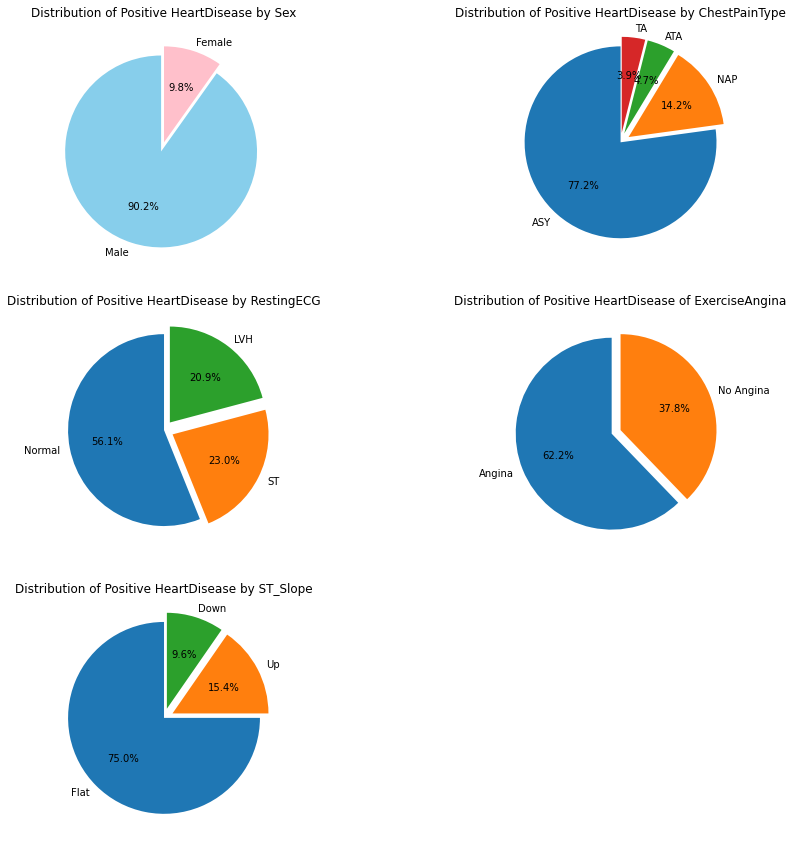

In [24]:
# Plotting Pie plots for the Categorical Variables with positive HeartDisease.

ax,fig = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
colors = ['skyblue','pink']

# Pie plot of HeartDisease by Sex.
plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Distribution of Positive HeartDisease by Sex');# Plot title

# Pie plot of  HeartDisease by ChestPainType.
plt.subplot(3,2,2)
plt.pie(chestpain,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1))
plt.title('Distribution of Positive HeartDisease by ChestPainType'); # Plot title

# Pie plot of HeartDisease by RestingECG.
plt.subplot(3,2,3)
plt.pie(restingecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1))
plt.title('Distribution of Positive HeartDisease by RestingECG'); #Plot Title

#Pie plot of HeartDisease by ExerciseAngina.
plt.subplot(3,2,4)
plt.pie(exerangina,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0))
plt.title('Distribution of Positive HeartDisease of ExerciseAngina'); # Plot Title

#Pie plot of HeartDisease by ST_Slope.
plt.subplot(3,2,5)
plt.pie(stslope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1))
plt.title('Distribution of Positive HeartDisease by ST_Slope'); # Plot Tile

#### Observations of Pie plots : 

The above plots are plotted for more clear idea about the percentage of impact of the categorical feature on positive HeartDisease

* From the pie plot of 'Sex Vs Positive HeartDisease' we see that about 90% of the patients are male.

* From the pie plot of 'ChestPainType vs Positive HeartDisease' we see that about 77.2% of the patient with HeartDisease are having ASY type of Chest Pain.

* From the pie plot 'RestingECG vs Positive HeartDisease' we see that the patients having HeartDisease have RestingECG normal level which is 56.1% 

* From the pie plot 'ExerciseAngina' we see that the patients having HeartDisease , have the problem of Exercise Induced Angina of about 62.2%

* From the pie plot 'ST_Slope vs Postivie HeartDisease' we see that about 75% of patients having HeartDisease have a flat ST_Slope.


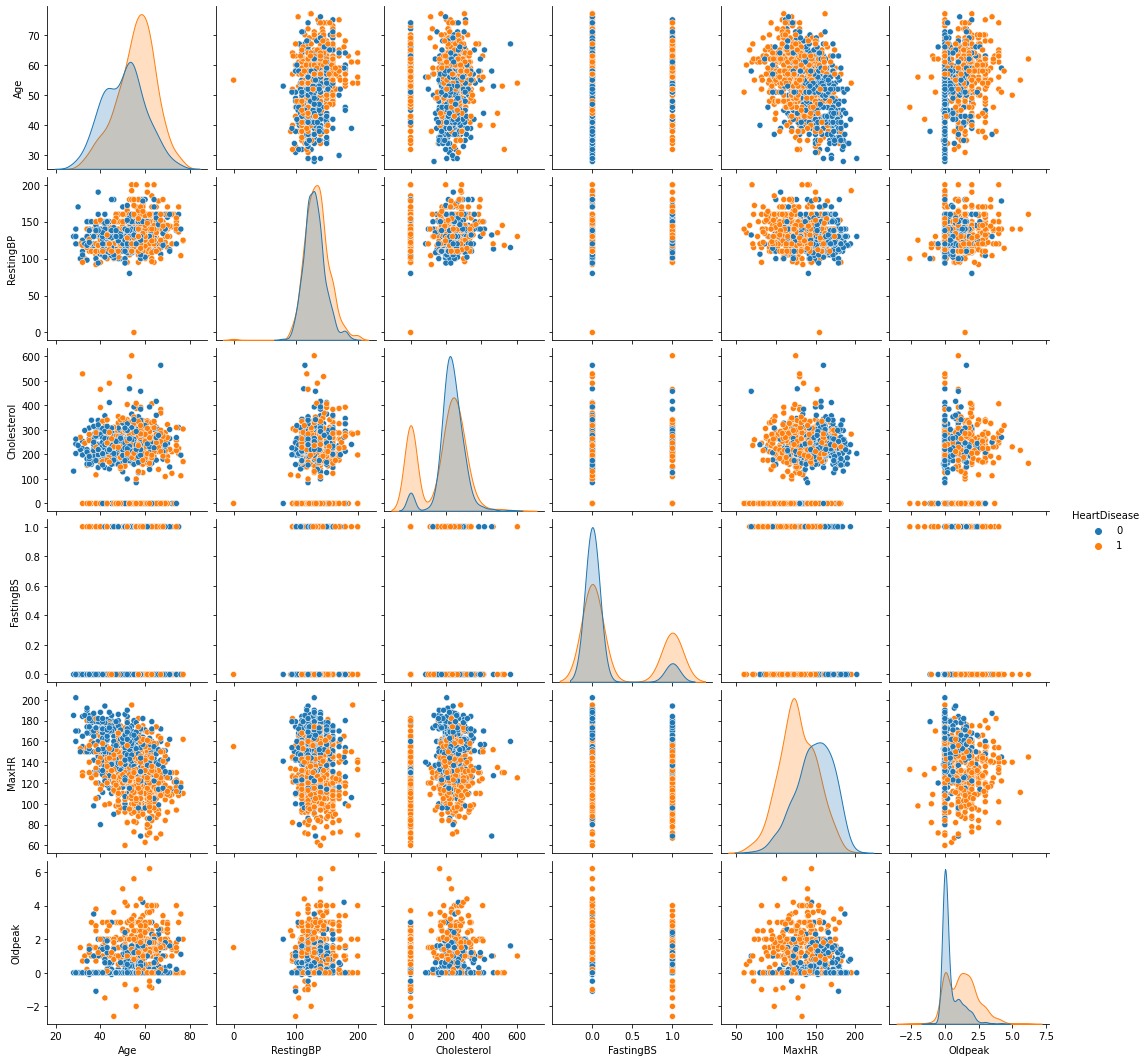

In [25]:
# Let's use pairplot() function from seaborn to understand the relationship between all features.

sns.pairplot(heartdf,hue="HeartDisease");


Text(0.5, 1.0, 'Correlation Heatmap of Heart Disease dataset')

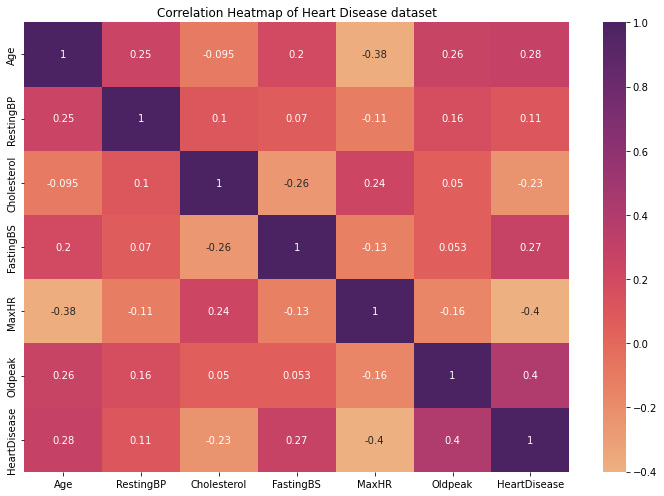

In [26]:
# Let's plot a correlation heatmap of the heart disease dataset.

# Calculate the correlation coefficient with corr().
corr_number = heartdf.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
sns.heatmap(corr_number, annot = True, cmap = 'flare')

# Title of the plot
plt.title('Correlation Heatmap of Heart Disease dataset')


#### Observations of Pairplot and Correlation Heat Map:

* From the pair plot above we can see that some features are correlated with the target variable. In individuals who are older and having high RestingBP are more prone to HeartDisease.

* From the above correlation heat map we see some features are positively correlated with HeartDisease and some features are negatively correlated, but the correlation seems to be very low.

* It is better to create dummy variables for the categorical varibales of the dataset.

* As per the above correlation heat map we can say that Age, RestingBP are having good correlation with the HeartDisease.


### Box plot to identify Outliers : 

Text(0.5, 1.0, 'Boxplot of the Heart dataset')

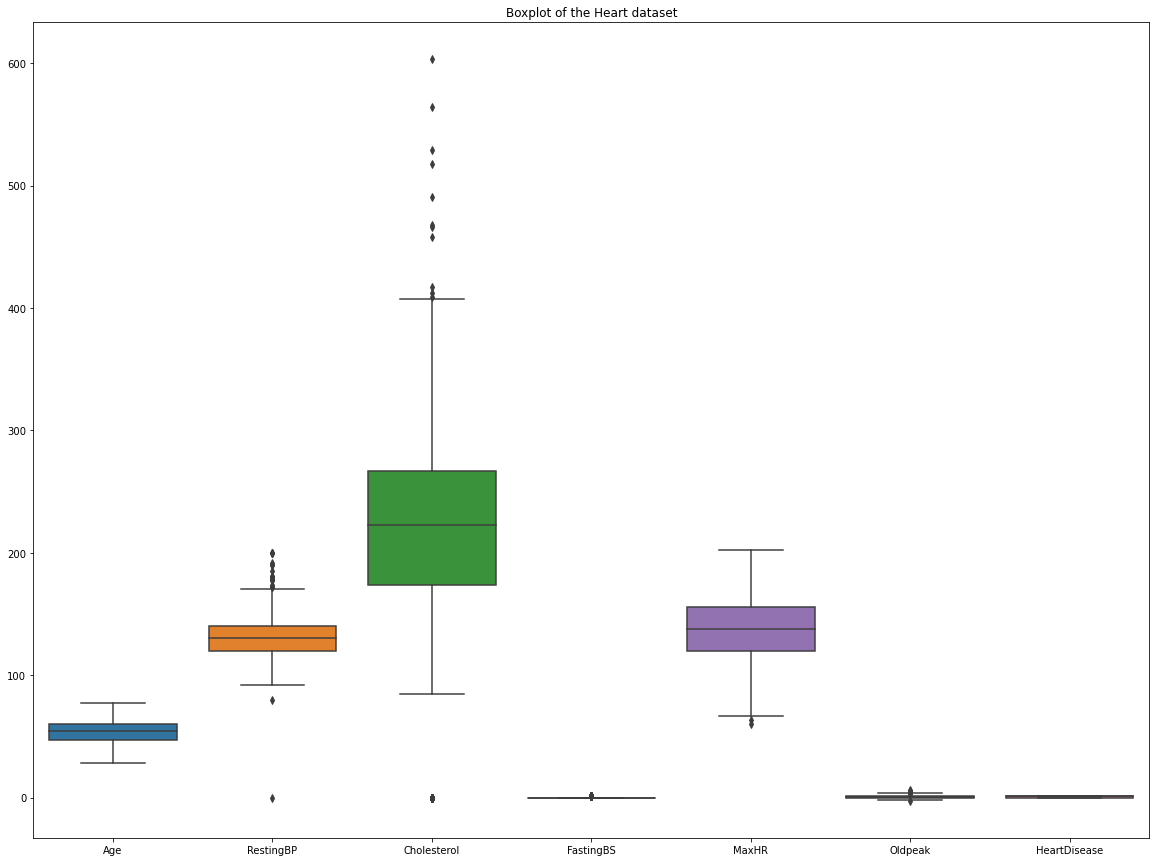

In [27]:
# let's plot a boxplot for the heart dataset.
plt.figure(figsize=(20,15))
sns.boxplot(data = heartdf)
# Plot title
plt.title('Boxplot of the Heart dataset')

#### Observations of boxplot :

 * From the above boxplot we see that there are outliers present in the features Age, RestingBP, Cholesterol, Oldpeak and MaxHR.

### Conclusions from Milestone -1 : Data Selection and EDA.

* The dataset has 918 rows and 12 columns.

* The target variable "HeartDisease" is well distributed.

* There are no missing values and duplicated data in the dataset.

* The observations from the plots of patients having positive HeartDisease with different variables in the dataset says that the males are more in number, ChestPainType ASY is more dominant, FastingBS is less, RestingECG is low, ST_Slope is flat.

* The people of age above 50 years, having RestingBP between 95 - 170 , having Cholesterol ranging between 160 - 340 are more prone to HeartDisease.

* We can see some features having a good correlation with the HeartDisease like Age, Sex, but the correlation strength is very low.

* In the data preparation step it is recommended to create dummy variables for the categorical variables.

* Ethical Consederations - The ethical concerns that are to be considered in handling the data are privacy, confidentiality, honesty and fairness. While handling the data I have taken care that the data is not biased towards any factors causing heartdisease. All the data is validated to ensure that the facts are not misrepresented in the visualizations.


## Milestone 2: Data Preparation

* In the Milestone 2 I would like to discuss about Data Preparation and identifying the features that are most influential for having Heart Disease.

* In the data preparation I would like to describe the handling of outliers, creating dummy variables for the categorical features,elimination of the non essential features if any,and finally splitting the data into training(80%) and test(20%) data sets.

In [28]:
#Let's define a function for detecting outliers using IQR method.

def outliers_IQR(df):

   q1 = df.quantile(0.25)

   q3 = df.quantile(0.75)

   IQR = q3-q1

   outlier = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outlier

In [29]:
# Now let's check for the outliers in features : Age.
outlier = outliers_IQR(heartdf['Age'])

print('Total number of outliers in feature Age : '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature Age : 0
Max. outlier value : nan
Min. outlier value : nan


In [30]:
# Outliers in -  RestingBP

outlier = outliers_IQR(heartdf['RestingBP'])

print('Total number of outliers in feature RestingBP: '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature RestingBP: 28
Max. outlier value : 200
Min. outlier value : 0


In [31]:
# Outliers in  Cholesterol
outlier = outliers_IQR(heartdf['Cholesterol'])

print('Total number of outliers in feature Cholesterol : '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature Cholesterol : 183
Max. outlier value : 603
Min. outlier value : 0


In [32]:
# Outliers in Oldpeak.

outlier = outliers_IQR(heartdf['Oldpeak'])

print('Total number of outliers in feature Oldpeak : '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature Oldpeak : 16
Max. outlier value : 6.2
Min. outlier value : -2.6


In [33]:
# Outliers in MaxHR.
outlier = outliers_IQR(heartdf['MaxHR'])

print('Total number of outliers in feature MaxHR : '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature MaxHR : 2
Max. outlier value : 63
Min. outlier value : 60


#### Observations:

* From the above we see that we have more outliers in features "RestingBP" and "Cholesterol" where we see minimum outlier value as '0'

In [34]:
# Let's calculate the median of the 'Cholesterol' column so as to replace the zeros with the median.
median = round(heartdf['Cholesterol'].median(),0)
median

223.0

In [35]:
# Let's replace the zeros from Cholesterol with the median.

heartdf['Cholesterol'].replace(0, heartdf['Cholesterol'].median(),inplace=True)
heartdf['Cholesterol']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

In [36]:
# Let's calculate the median of the 'RestingBP' column so as to replace the zeros with the median.
median = round(heartdf['RestingBP'].median(),0)
median

130.0

In [37]:
# Now let's replace the zeros from RestingBP with the median.

heartdf['RestingBP'].replace(0, heartdf['RestingBP'].median(),inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap of Heart Disease dataset')

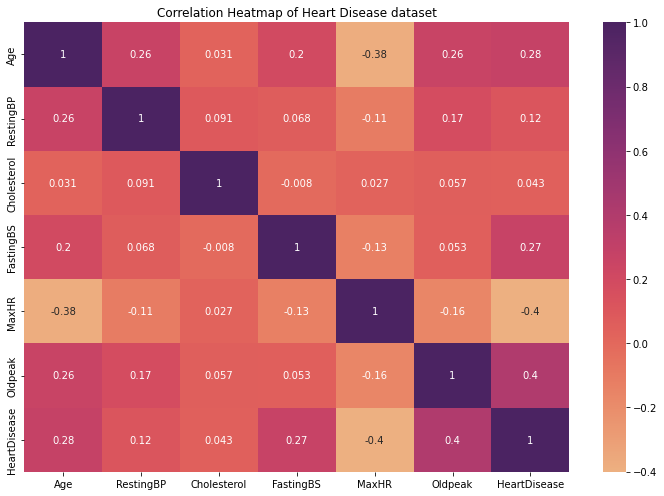

In [38]:
# Let's plot a correlation heatmap of the heart disease dataset.

# Calculate the correlation coefficient with corr().
corr_number = heartdf.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
sns.heatmap(corr_number, annot = True, cmap = 'flare')

# Title of the plot
plt.title('Correlation Heatmap of Heart Disease dataset')

#### Observations:

* From the above correlation map, we can see the correlation between HeartDisease and the remaining features has been improved after the removal of outliers.

* We can see that Age, RestingBP,Oldpeak are having high correlation with the target "HeartDisease."

In [39]:
# Now that we have replaced the zeros 
# Let's create dummy variables for the categorical features.
# Consider the categorical variables.
categ_col = heartdf.select_dtypes(include=object).columns

# Creating dummy variables using pd.get_dummies()
heartdf = pd.get_dummies(heartdf,columns=categ_col, drop_first=True)  

# Print the first five rows of the dataset after creating the dummy variables for the categorical features.
heartdf.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [40]:
# Getting the shape of the heart dataset
heartdf.shape

(918, 16)

In [41]:
# Checking for any nulll values after creating dummy variables.
heartdf.isnull().sum().sum()

0

In [42]:
# Let's define the features and target variables X and y respectively.

X = heartdf.drop('HeartDisease', axis = 1)
y = heartdf['HeartDisease']

In [43]:
# Let's split the dataset into 80% train and 20% test datasets using train_test_split().
# Test size is 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [44]:
# Let's get the size of the test and train datasets.

print("X_train shape : {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))
print("y_train shape : {} rows.".format(y_train.shape[0]))
print("X_test shape : {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))
print("y_test shape : {} rows.".format(y_test.shape[0]))

X_train shape : 734 rows and 15 columns.
y_train shape : 734 rows.
X_test shape : 184 rows and 15 columns.
y_test shape : 184 rows.


#### Observations :

* After creating the dummy varibales the size of the dataset if 918 rows and 16 columns, dropped the first column while creating the dummy varibales.

* The following are the size of the test and train data sets shape.

    a. X_train shape : 734 rows and 15 columns.
    
    b. y_train shape : 734 rows.
    
    c. X_test shape : 184 rows and 15 columns.
    
    d. y_test shape : 184 rows.


In [45]:
# Using the standard scaler on X_train and X_test datasets.
# Fit the transform.

standscaler = StandardScaler()
X_train_std = standscaler.fit_transform(X_train)
X_test_std = standscaler.transform(X_test)

In [46]:
# Let's create a PCA that will retain 90% of the variance
pcah = PCA(n_components=0.90, whiten = True)

In [50]:
# Conduct PCA

X_train_pcah = pcah.fit_transform(X_train_std)

In [51]:
# Print the number of features of the train dataset.
print('Original number of features of the train dataset:', X_train.shape[1])
# Print the features of the PCA transformed train dataset.
print('Reduced number of features of the train dataset :', X_train_pcah.shape[1])

Original number of features of the train dataset: 15
Reduced number of features of the train dataset : 11


In [49]:
# Let's use the transform() method on the test features with PCA retaining 90% of the variance but not fit the transform.

X_test_pcah = pcah.transform(X_test_std)

#### Observations:

* The heart dataset is split into 80% training and 20% test datasets. The features considered here are 15.

* I have used the Principal Component Analysis(PCA) and the train test data sets have been split, with this the features have been reduced from 15 to 11.


## Summary from Milestone 2 : Data Preparation

* Removed outliers identified in the dataset using the interquartile range method.

* The columns 'Cholesterol' and 'RestingBP'are having zeros, the zeros are replaced with the median value of the respective columns.

* Correlation heat map is plotted and identified the features that are having good correlation to the target varibale.

* Dummy variables are created for the categorical columns and the data set is split into 80% test and 20% train datasets.

* Principal Component Analysis(PCA) is applied and second set of train and test data sets are created, with this the features have been reduced from 15 to 11.

* The data is now prepared for performing different model building and evaluation.